# Building Popularity based recommender system

In [10]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [11]:
#Importing data
data = pd.read_csv('C:/Users/neha1/Desktop/Innomatics/Movie Rec Sys/MoviesData.csv')

Exploratory data analysis

In [41]:
data.head()

,index,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,...,production_countries,status,popularity,vote_average,vote_count,keywords,cast,director,rating_count,mean_rating
0,0,680,Pulp Fiction,1994,Saturday,"['Thriller', 'Crime']",en,154.0,"A burger-loving hit man, his philosophical par...","['Miramax Films', 'A Band Apart', 'Jersey Films']",...,['United States of America'],Released,140.950236,8.3,8670.0,"['transporter', 'brothel', 'drug dealer', 'box...","['John Travolta', 'Samuel L. Jackson', 'Uma Th...",Quentin Tarantino,341.0,4.054252
1,1,235,Stand by Me,1986,Friday,"['Crime', 'Drama']",en,89.0,"After the death of a friend, a writer recounts...","['Columbia Pictures', 'Act III Communications'...",...,['United States of America'],Released,15.206957,7.8,1568.0,"['based on novel', 'friendship', 'coming of ag...","['Wil Wheaton', 'River Phoenix', 'Corey Feldma...",Rob Reiner,324.0,4.256173
2,2,640,Catch Me If You Can,2002,Wednesday,"['Drama', 'Crime']",en,141.0,"A true story about Frank Abagnale Jr. who, bef...","['Kemp Company', 'Splendid Pictures', 'Parkes/...",...,['United States of America'],Released,19.833077,7.7,3917.0,"['con man', 'biography', 'fbi agent', 'overhea...","['Leonardo DiCaprio', 'Tom Hanks', 'Christophe...",Steven Spielberg,311.0,4.487138
3,3,74,War of the Worlds,2005,Tuesday,"['Adventure', 'Thriller', 'Science Fiction']",en,116.0,Ray Ferrier is a divorced dockworker and less-...,"['Paramount Pictures', 'DreamWorks SKG', 'Crui...",...,['United States of America'],Released,19.929377,6.2,2397.0,"['post traumatic stress disorder', 'new jerse...","['Tom Cruise', 'Dakota Fanning', 'Miranda Otto...",Steven Spielberg,304.0,4.138158
4,4,281338,War for the Planet of the Apes,2017,Tuesday,"['Drama', 'Science Fiction', 'War']",en,140.0,Caesar and his apes are forced into a deadly c...,['Chernin Entertainment'],...,"['Canada', 'United States of America']",Released,146.161786,6.7,1675.0,"['based on novel', 'sequel', 'talking animal',...","['Andy Serkis', 'Woody Harrelson', 'Steve Zahn...",Matt Reeves,291.0,4.221649


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45430 entries, 0 to 45429
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 45430 non-null  int64  
 1   tmdbId                45430 non-null  int64  
 2   title                 45430 non-null  object 
 3   release_year          45430 non-null  object 
 4   release_day           45430 non-null  object 
 5   genres                45430 non-null  object 
 6   original_language     45419 non-null  object 
 7   runtime               45430 non-null  float64
 8   content               44484 non-null  object 
 9   production_companies  45430 non-null  object 
 10  budget                45430 non-null  int64  
 11  revenue               45430 non-null  float64
 12  production_countries  45430 non-null  object 
 13  status                45430 non-null  object 
 14  popularity            45430 non-null  float64
 15  vote_average       

Text(0.5, 1.0, 'votes')

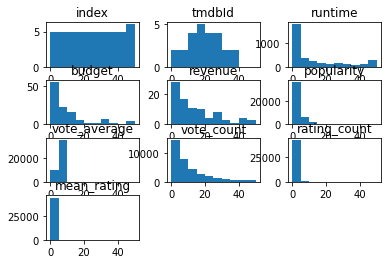

In [14]:
data.hist(grid=False, bins=range(0,55,5))
plt.xlabel('vote_average')
plt.ylabel('No.of votes')
plt.title('votes')

Text(0.5, 1.0, 'popularity')

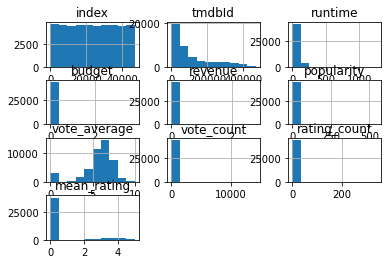

In [15]:
data.hist()
plt.xlabel('popularity')
plt.ylabel('rating_count')
plt.title('popularity')

Using weighted average method based on votings and popularity 

In [16]:
C= data['vote_average'].mean()
m= data['vote_count'].quantile(0.9)
q_movies = data.loc[data['vote_count'] >= m]
q_movies.shape

(4550, 22)

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
    q_movies['rating_count'] = q_movies.apply(weighted_rating, axis=1)
 
 
#Sorting movies based on score calculated above
q_movies = q_movies.sort_values('rating_count', ascending=False)

#Printing the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'rating_count']].reset_index(drop=True).head(10)

,title,vote_count,vote_average,rating_count
0,Pulp Fiction,8670,8.3,341
1,Stand by Me,1568,7.8,324
2,Catch Me If You Can,3917,7.7,311
3,War of the Worlds,2397,6.2,304
4,War for the Planet of the Apes,1675,6.7,291
5,The Perfect Storm,609,6.2,274
6,Moneyball,1409,7.0,259
7,The Great Escape,731,7.8,247
8,The Jungle Book,2977,6.7,244
9,Equals,386,5.9,237


Text(0.5, 1.0, 'Popular Movies')

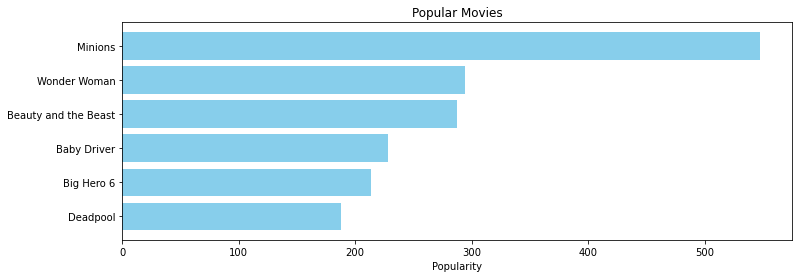

In [18]:
pop= data.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")